In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
df = pd.read_csv("./insurance.csv")

print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [24]:
df.shape

(1338, 7)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Sardor\AppData\Local\Temp\ipykernel_4872\201379171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


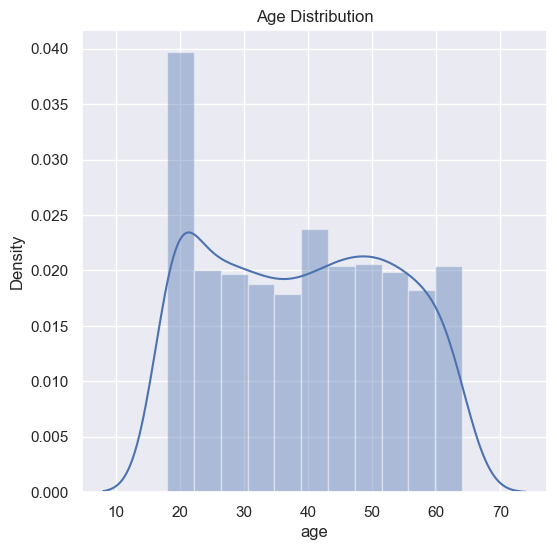

In [28]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

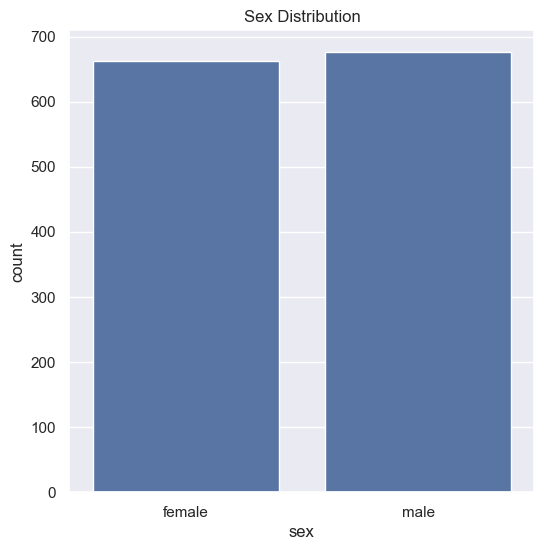

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")

In [30]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Sardor\AppData\Local\Temp\ipykernel_4872\1018674143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


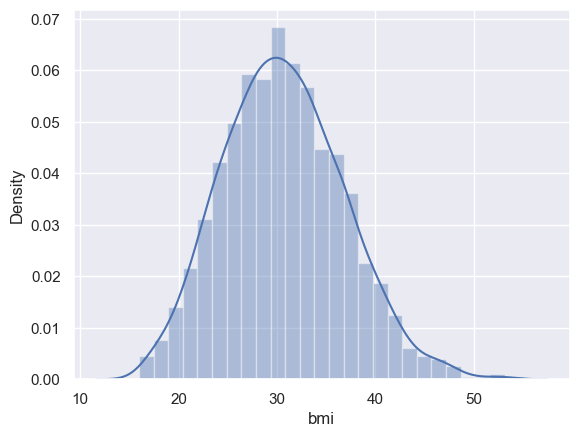

In [31]:
sns.distplot(df['bmi'])
plt.show()

In [32]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [33]:
df.replace({'sex':{'male':0, 'female':1}},inplace=True)

In [34]:
df.replace({'smoker': {'yes':0,'no':1}},inplace=True)

In [35]:
df.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [36]:
X = df.drop(columns="charges",axis=1)
y = df['charges']
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [37]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(1070, 6)

In [39]:
X_test.shape

(268, 6)

In [40]:
model = LinearRegression()


In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
training_data_prediction = model.predict(X_train)

In [45]:
r2_train = metrics.r2_score(y_train,training_data_prediction)
r2_train

0.7480682612214677

In [46]:
test_data_prediction = model.predict(X_test)
metrics.r2_score(y_test,test_data_prediction)

0.7557328505792209

In [48]:
sample_input_data = (30,1,22.7,0,1,0)

In [49]:
input_data_as_numpy_array = np.asarray(sample_input_data)

In [50]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [51]:
prediction = model.predict(input_data_reshaped)

c:\Users\Sardor\.virtualenvs\C++ amaliyot\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
print("Insulin cost:",prediction)

Insulin cost: [2367.15090987]
